<a href="https://colab.research.google.com/github/shengjiyang/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93]

sales_data = pd.DataFrame({'sales' : sales, 'customers' : customers})
sales_data

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [0]:
# Mean Number of Sales

avg_sales = sales_data.sales.sum() / len(sales_data.sales)
avg_sales

3052.714285714286

In [0]:
sales_data['distance'] = sales_data.sales - avg_sales
sales_data

,sales,customers,distance
0,3505,127,452.285714
1,2400,80,-652.714286
2,3027,105,-25.714286
3,2798,92,-254.714286
4,3700,120,647.285714
5,3250,115,197.285714
6,2689,93,-363.714286


In [0]:
sales_data['distance_squared'] = sales_data.distance ** 2
sales_data

,sales,customers,distance,distance_squared
0,3505,127,452.285714,204562.367347
1,2400,80,-652.714286,426035.938776
2,3027,105,-25.714286,661.224490
3,2798,92,-254.714286,64879.367347
4,3700,120,647.285714,418978.795918
5,3250,115,197.285714,38921.653061
6,2689,93,-363.714286,132288.081633


In [0]:
# Variance
days = len(sales)
variance = sales_data.distance_squared.sum() / (len(sales) - 1)

print('Variance: ', variance)

# Seems kind of large.

Variance:  214387.90476190473


In [0]:
variance_pop = sales_data.distance_squared.sum() / (len(sales))
variance_pop

183761.06122448976

In [0]:
# Standard Deviation of Sales
sales_std = sales_data.sales.std(ddof = 0)
sales_std

428.67360686714756

In [0]:
# Standard Deviation can also be calculated like so:

import numpy as np

np.sqrt(variance)

# This way we can tell that variance was calculated correctly:)

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
sales_subset = sales_data[['sales', 'customers']]
sales_subset

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [0]:
covariance = sales_subset.cov()
covariance

# The covariance of sales (in dollars) and customers is 7604.36

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
customers_std = sales_data.customers.std(ddof = 0)
customers_std

15.792015549069118

In [0]:
from sklearn.metrics import r2_score

print(sales_subset.corr())
# r = 0.9628, indicating a strong linear relationship between the number of
# customers on any given day and the sales on that day.

              sales  customers
sales      1.000000   0.962834
customers  0.962834   1.000000


-35536.112520458264

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

print(df.shape)
df.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
df = df.drop('Unnamed: 0', axis = 1)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
u = np.array([[1.4],
              [4.2]])
v = np.array([[6],
              [-2]]).T

print(u.shape)
print(v.shape)
print(u)
print(v)

np.dot(v, u)
# np.dot(v, u) ~ 0;
# therefore the two vectors are orthogonal.

(2, 1)
(1, 2)
[[1.4]
 [4.2]]
[[ 6 -2]]


array([[-1.77635684e-15]])

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([[-5],
             [3],
             [7]])

b = np.array([[6],
              [-8],
              [2]]).T

np.dot(b, a)

array([[-40]])

####$\vec{a} \cdot \vec{b} \neq 0$ ;

therefore, a and b are not orthogonal to one another.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([[2, -15, 6, 20]])

# ||c||^2
np.linalg.norm(c) ** 2

665.0

In [132]:
# c dot c
(c * c).sum()

665

In [0]:
# (c^T)c 
np.dot(c, c.T)

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

####$d = 7\hat{i} + 12\hat{j}$

####$e = 2\hat{i} + 11\hat{j} - 8\hat{k}$



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])
f_unit = f / np.linalg.norm(f)
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

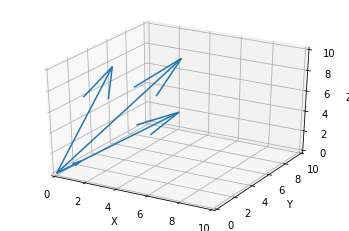

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Dependent Vectors
alpha = [1, 1, 1]
bravo = [5, 5, 5]

# Independent Vectors
charlie = [4, 7, 9]
delta = [2, 3, 9.5]

vectors = np.array([[0, 0, 0, 1, 1, 1],
                    [0, 0, 0, 5, 5, 5],
                    [0, 0, 0, 4, 7, 9],
                    [0, 0, 0, 2, 3, 9.5]])


X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

####Vectors $\vec{\alpha}$ (alpha) and $\vec{\beta}$ (bravo) are linearly dependent.

Hence why $\vec{\alpha}$ is not visable. It is hidden by the larger $\vec{\beta}$.

####Vectors $\vec{\gamma}$ (charlie) and $\vec{\delta}$ (delta) are linearly independent.

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

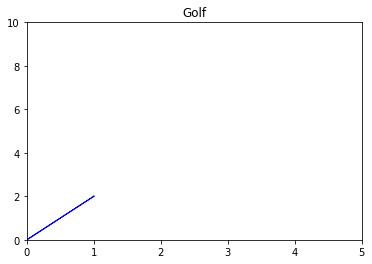

In [90]:
import matplotlib.pyplot as plt

ax, fig = plt.subplots()
ax = plt.axes()
ax.set_xlim(0, 5)
ax.set_ylim(0, 10)

g = [1, 2]
h = [4, 8]

plt.arrow(0, 0, g[0], g[1], head_width = 0.02, head_length = 0.01, color = 'b')
# plt.arrow(0, 0, h[0], h[1], head_width = 0.02, head_length = 0.01, color = 'r')

plt.title('Golf');

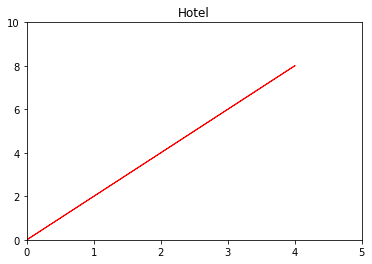

In [91]:
import matplotlib.pyplot as plt

ax, fig = plt.subplots()
ax = plt.axes()
ax.set_xlim(0, 5)
ax.set_ylim(0, 10)

g = [1, 2]
h = [4, 8]

plt.arrow(0, 0, h[0], h[1], head_width = 0.02, head_length = 0.01, color = 'r')

plt.title('Hotel');

####$m_g = 2$ and $m_h = 2$;

#####therefore, both vectors are dependent in relation to one another.

####Both vector's span is the family of linear functions written with the form $y = 2x + b$.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

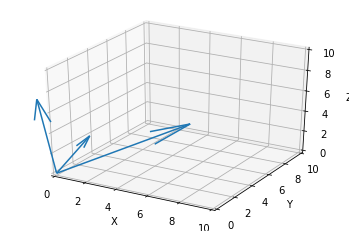

In [92]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Independent Vectors
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

vectors = np.array([[0, 0, 0, 1, 2, 3],
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2]])


X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

#####Since all three vectors are independent of one another, their span is all of $\mathbb{R}^{3}$.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



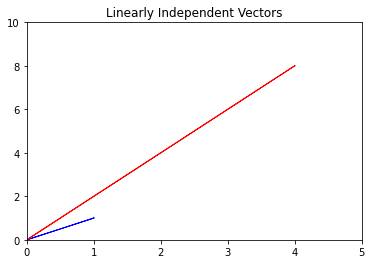

In [95]:
import matplotlib.pyplot as plt

ax, fig = plt.subplots()
ax = plt.axes()
ax.set_xlim(0, 5)
ax.set_ylim(0, 10)

g = [1, 1]
h = [4, 8]

plt.arrow(0, 0, g[0], g[1], head_width = 0.02, head_length = 0.01, color = 'b')
plt.arrow(0, 0, h[0], h[1], head_width = 0.02, head_length = 0.01, color = 'r')

plt.title('Linearly Independent Vectors');

## 6.2 What does it mean to form a basis?

For two vectors to form a basis for a vector space $V$ means that those two vectors to be linearly independent of one another and for their linear combinations (variants) to fill the space.

In other words, they do not fall within the same family of linear functions.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

#### Using Gaussian Elimination
#### Step 1: Add Row 1 to Row 2

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

#### Step 2: Subtract 4 * Row 1 from Row 3

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

#### Step 3: Multiply Row 2 by $\dfrac{1}{2}$

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

#### Step 3: Multiply Row 2 by $\dfrac{1}{2}$

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

#### Step 4: Multiply Row 3 by $\dfrac{-1}{10}$

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & 1
\end{bmatrix}
\end{align}

#####Now the matrix is in row-exchelon form.
#####Since the bottom was left with a 1 rather than all zeroes, and all of the values vectors which constitute the matrix are independent, the matrix is Rank 3.

## 7.2 What does the rank of a matrix tell us?

The number of dimensions of the vector space filled by a given matrix's columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(\vec{w})$

## graph your projected vector to check your work (make sure your axis are square/even)

###$proj_{L}(\vec{w}) = c\vec{v}$

###$proj_{\vec{a}}(\vec{b}) = \dfrac{(\vec{a} \cdot \vec{b})}{||\vec{b}||^2}\vec{b}$

In [121]:
v = np.array([1, 3])
w = np.array([[-1],
              [2]])

v_dot_w = np.dot(v, w)
v_dot_w

array([5])

In [122]:
norm_v = np.linalg.norm(v)
norm_v

3.1622776601683795

In [126]:
proj = (v_dot_w[0] / norm_v ** 2) * v
proj

array([0.5, 1.5])

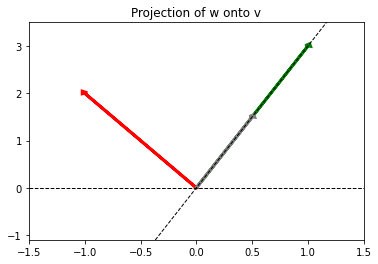

In [129]:
plt.xlim(-1.5, 1.5)
plt.ylim(-1.1, 3.5)

# Vectors & Projection
victor = [1, 3]
whiskey = [-1, 2]

# L Values
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3 * x_vals
y_xaxis = 0 * x_vals

plt.plot(x_vals, y_xaxis, '--', color = 'black', linewidth = 1)

# Plotting Vectors and L
plt.plot(x_vals, y_vals, '--', color = 'black', linewidth = 1)
plt.arrow(0, 0, victor[0], victor[1], linewidth = 3, head_width = 0.05,
          head_length = 0.05, color = 'green')
plt.arrow(0, 0, whiskey[0], whiskey[1], linewidth = 3, head_width = 0.05,
          head_length = 0.05, color = 'red')
plt.arrow(0, 0, proj[0], proj[1], linewidth = 3, head_width = 0.05,
          head_length = 0.05, color = 'gray')

plt.title('Projection of w onto v')
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

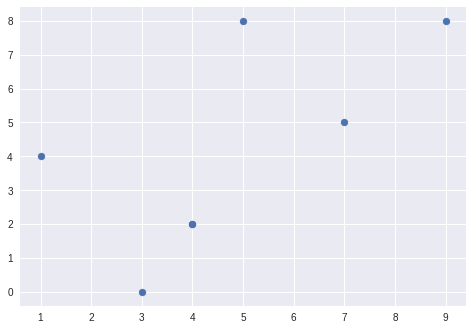

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()